# Libraries and Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge, Lasso

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
from sklearn.ensemble import StackingClassifier

- **CRIM**: Per capita crime rate by town  

- **ZN**: Proportion of residential land zoned for lots over 25,000 sq.ft.  

- **INDUS**: Proportion of non-retail business acres per town  

- **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  

- **NOX**: Nitric oxides concentration (parts per 10 million)  

- **RM**: Average number of rooms per dwelling  

- **AGE**: Proportion of owner-occupied units built prior to 1940  

- **DIS**: Weighted distances to five Boston employment centres  

- **RAD**: Index of accessibility to radial highways  

- **TAX**: Full-value property-tax rate per $10,000  

- **PTRATIO**: Pupil-teacher ratio by town  

- **B**: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town  

- **LSTAT**: Percentage of lower status of the population  

- **MEDV**: Median value of owner-occupied homes in $1000's  

# Data Preprocessing and Early Data Analysis (EDA):

## Load the Dataset

In [2]:
# Fetch the dataset from the original source
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Column names
feature_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", 
    "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]

# Create a DataFrame for the features
df = pd.DataFrame(data, columns=feature_names)

# Add the target variable MEDV to the DataFrame
df["MEDV"] = target

# Display the dataset
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## Handling Missing Values

In [3]:
# Datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [4]:
# Checking missing values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Visualizing Key Features

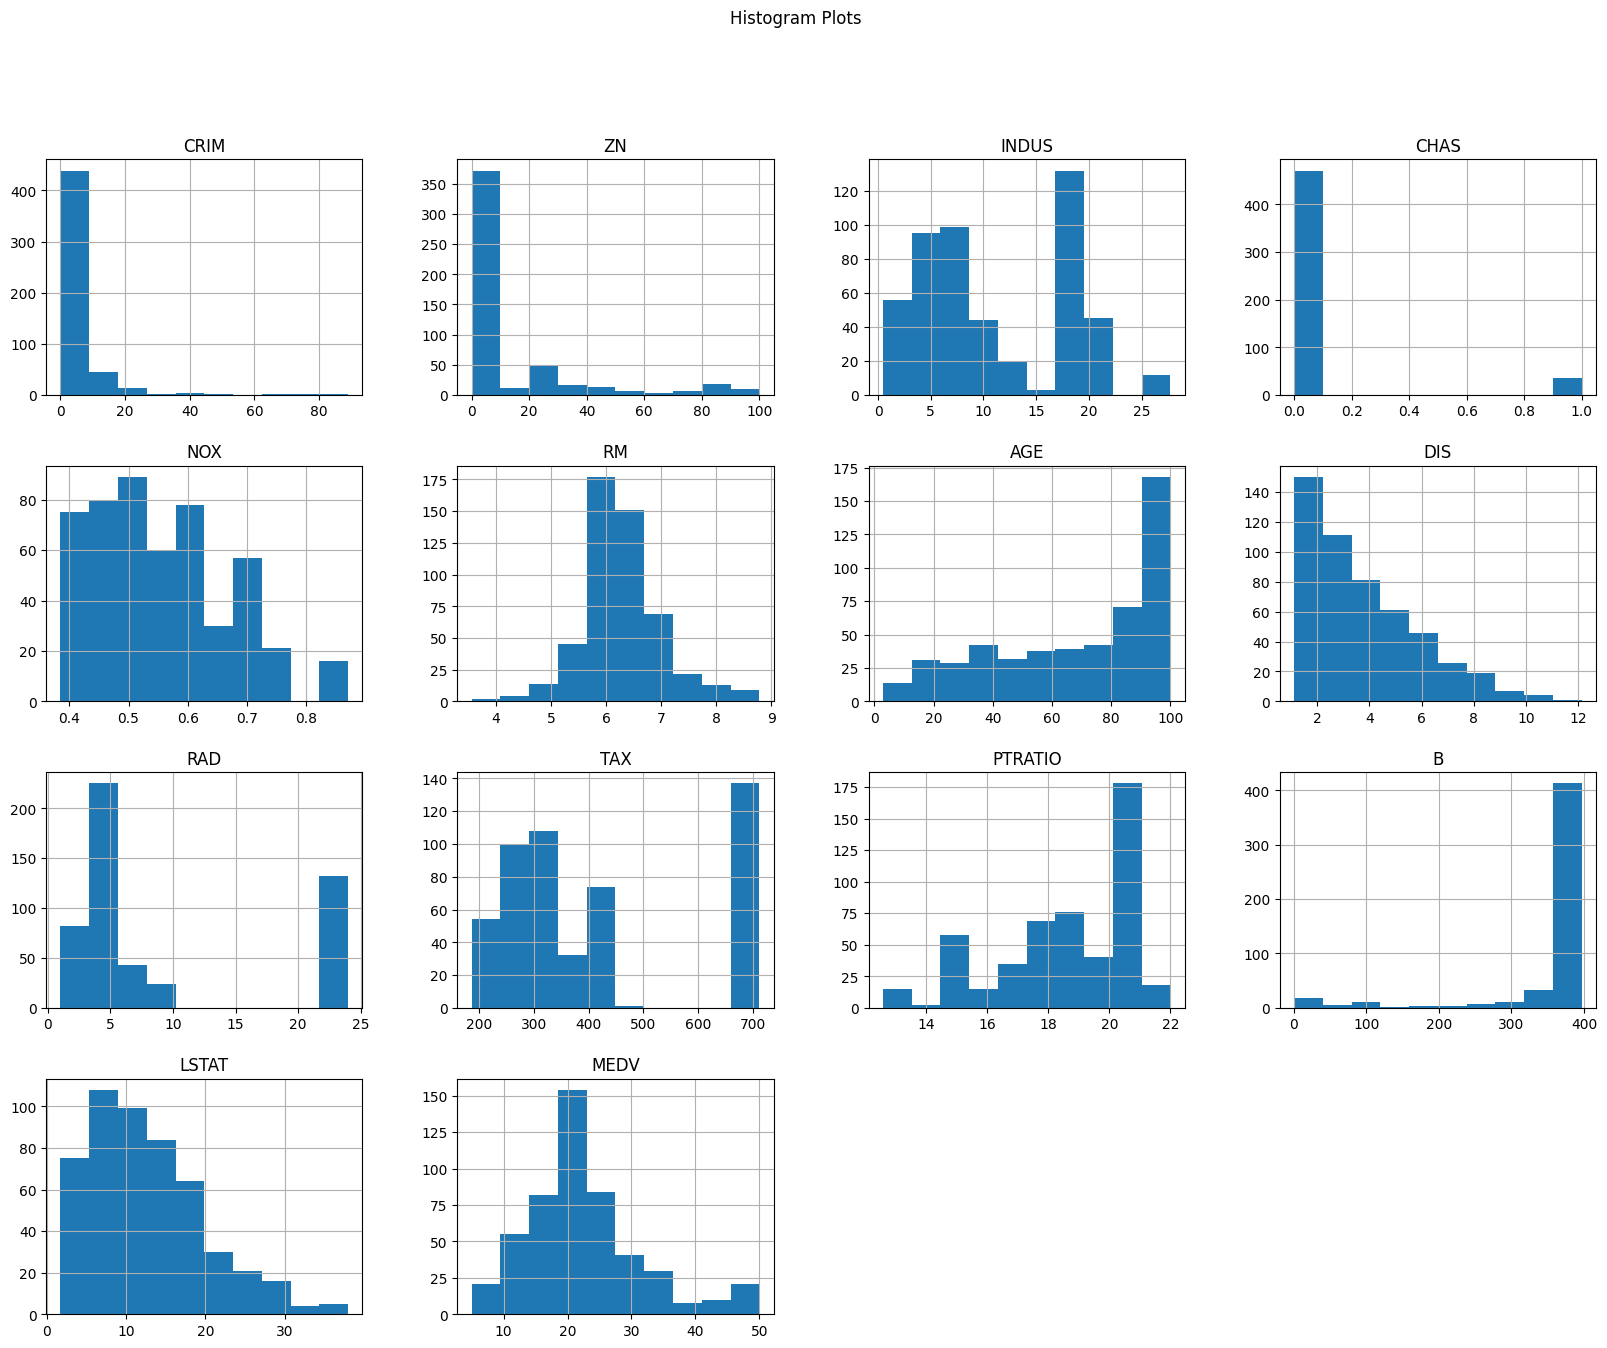

In [5]:
# Plot histograms for all numerical features
df.hist(figsize=(20, 15))
plt.suptitle("Histogram Plots")
plt.show()

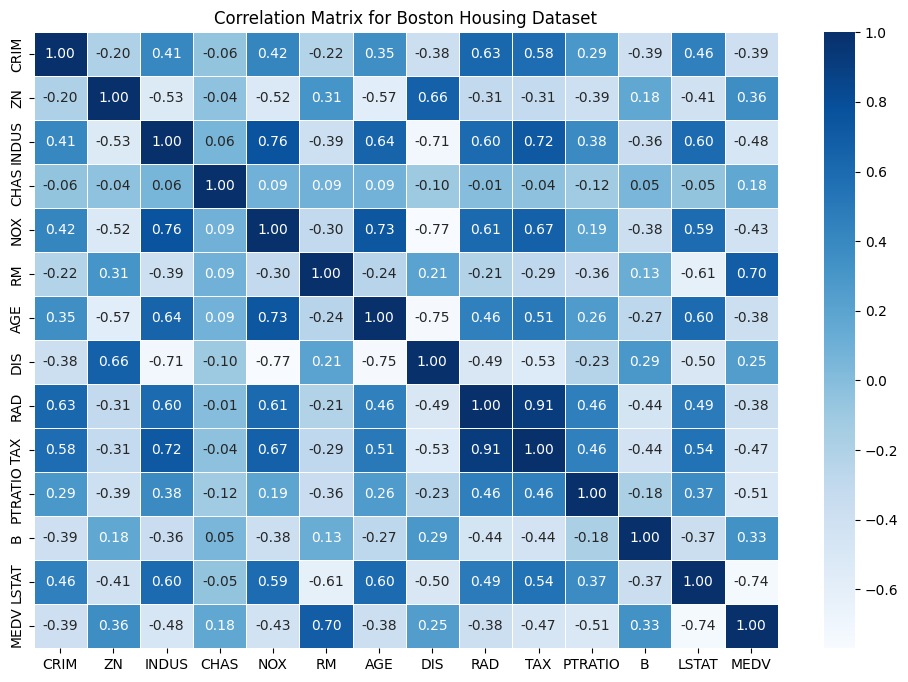

In [6]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Boston Housing Dataset")
plt.show()

### It seemed that dropping features caused performance decrease in the R² Scores, thus I used all the features in training and testing models.

## Apply Feature Scaling

In [7]:
# Update feature_names to reflect the remaining columns
feature_names = df.columns.drop('MEDV')  # Exclude the target variable 'MEDV'

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform only the feature columns (excluding the target variable)
df[feature_names] = scaler.fit_transform(df[feature_names])

# Display the updated DataFrame
print(f"\nPreprocessed Dataset")
df


Preprocessed Dataset


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,22.4
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,20.6
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,23.9
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,22.0


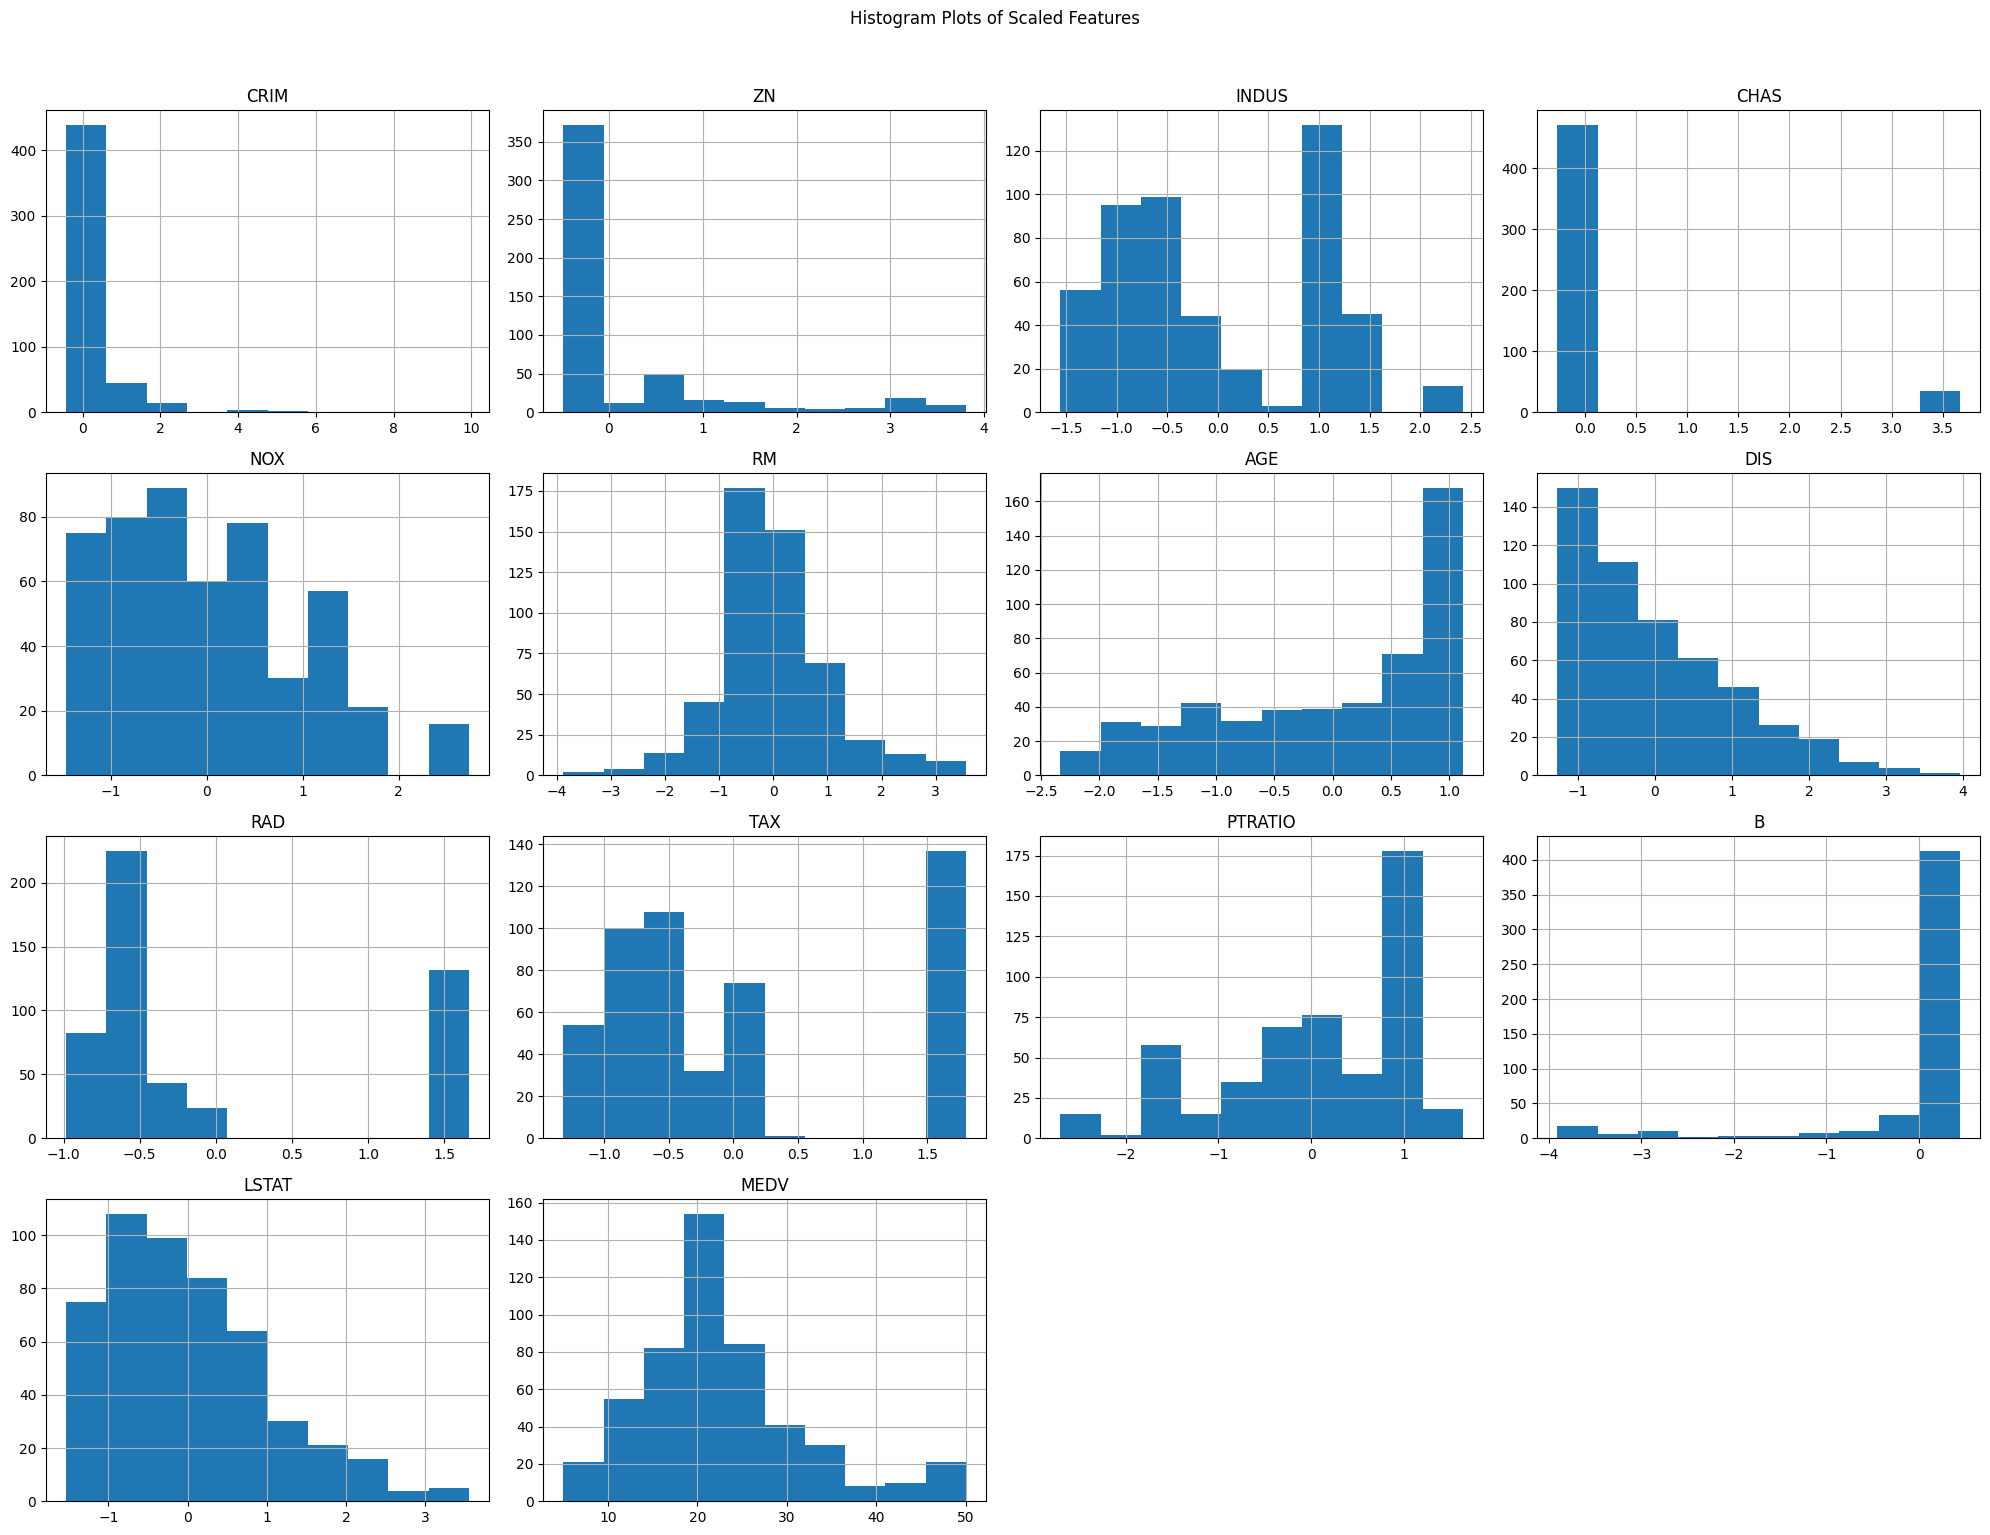

In [8]:
# Plot histograms for all scaled features
df.hist(figsize=(20, 15))
plt.suptitle("Histogram Plots of Scaled Features", y=1.02)
plt.tight_layout()
plt.show()

# Train and Evaluate Regression Models:

## Spliting the Data into Training and Testing Sets

In [9]:
# Features (X) and target (y)
X = df.drop("MEDV", axis=1)
y = df["MEDV"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Train Linear Regression

In [10]:
# Initialize and train the Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set 
y_pred_lr = model.predict(X_test)

# Evaluation metrics for Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Display metrics for Linear Regression
print(f"Mean Squared Error: {mse_lr}")
print(f"Mean Absolute Error: {mae_lr}")
print(f"R-squared: {r2_lr}")

Mean Squared Error: 21.517444231177265
Mean Absolute Error: 3.162709871457411
R-squared: 0.7112260057484925


## Train Decision Tree

In [11]:
# Initialize and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on test set
y_pred_dt = dt_model.predict(X_test)

# Evaluation Metrics for Decision Tree
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Display metrics for Decision Tree
print(f"Mean Squared Error: {mse_dt}")
print(f"Mean Absolute Error: {mae_dt}")
print(f"R-squared: {r2_dt}")

Mean Squared Error: 11.588026315789474
Mean Absolute Error: 2.5355263157894736
R-squared: 0.8444833592340152


## Train Random Forest

In [12]:
# Initialize and train the Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluation Metrics for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Display results for Random Forest
print(f"Mean Squared Error: {mse_rf}")
print(f"Mean Absolute Error: {mae_rf}")
print(f"R-squared: {r2_rf}")

Mean Squared Error: 9.609646282894735
Mean Absolute Error: 2.0817565789473678
R-squared: 0.8710341288379007


## Train Support Vector Machine  

In [13]:
# Initialize the SVM model
svr_model = SVR()

# Train the model
svr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svr = svr_model.predict(X_test)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Display results for SVM
print(f"Mean Squared Error: {mse_svr}")
print(f"Mean Absolute Error: {mae_svr}")
print(f"R-squared: {r2_svr}")

Mean Squared Error: 25.692905365809224
Mean Absolute Error: 2.9085238552886703
R-squared: 0.6551893976487938


## Compare performance


Model Performance Comparison:
            Model  R² Score       MSE      MAE
    Random Forest  0.871034  9.609646 2.081757
    Decision Tree  0.844483 11.588026 2.535526
Linear Regression  0.711226 21.517444 3.162710
              SVM  0.655189 25.692905 2.908524


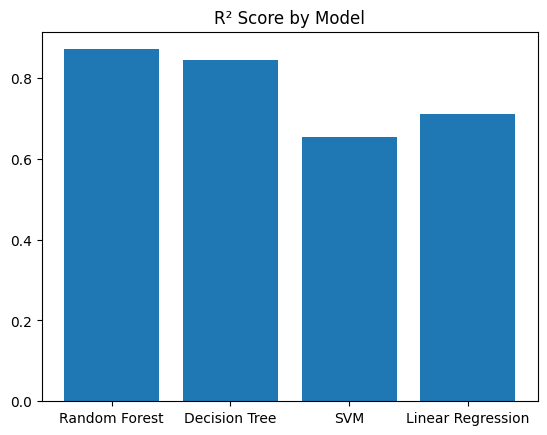

In [14]:
# Create a dictionary with the model names and evaluation metrics
model_metrics = {
    "Model": ["Random Forest", "Decision Tree", "SVM", "Linear Regression"],
    "R² Score": [r2_rf, r2_dt, r2_svr, r2_lr],
    "MSE": [mse_rf, mse_dt, mse_svr, mse_lr],
    "MAE": [mae_rf, mae_dt, mae_svr, mae_lr]
}

# Create a DataFrame from the dictionary
comparison_df = pd.DataFrame(model_metrics)

# Sort by R² Score (descending) and round metrics
comparison_df = comparison_df.sort_values(by="R² Score", ascending=False)

# Display the comparison table with proper formatting
print("\nModel Performance Comparison:")
print(comparison_df.to_string(index=False))

# Plotting
plt.bar(model_metrics["Model"], model_metrics["R² Score"])
plt.title("R² Score by Model")
plt.show()

# Tune hyperparameters using GridSearchCV and RandomizedSearchCV

## Hypertuning Linear Regression

In [15]:
# Initialize Ridge model
ridge = Ridge(random_state=42)

# Define parameter grid for Ridge
param_grid_ridge = {'alpha': [0.1, 1, 10, 100]}

# GridSearchCV
grid_ridge = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='r2', n_jobs=-1)
grid_ridge.fit(X_train, y_train)
best_grid_ridge = grid_ridge.best_estimator_
y_pred_grid_ridge = best_grid_ridge.predict(X_test)

# RandomizedSearchCV
random_ridge = RandomizedSearchCV(ridge, param_grid_ridge, n_iter=3, cv=5, scoring='r2', random_state=42, n_jobs=-1)
random_ridge.fit(X_train, y_train)
best_random_ridge = random_ridge.best_estimator_
y_pred_random_ridge = best_random_ridge.predict(X_test)

# Print results
print("\nRidge Regression (L2):")
print("\nGridSearchCV Best Params:", grid_ridge.best_params_)
print(f"R² (GridSearchCV): {r2_score(y_test, y_pred_grid_ridge):.3f}")
print(f"MSE (GridSearchCV): {mean_squared_error(y_test, y_pred_grid_ridge):.3f}")
print(f"MAE (GridSearchCV): {mean_absolute_error(y_test, y_pred_grid_ridge):.3f}")
print("\nRandomizedSearchCV Best Params:", random_ridge.best_params_)
print(f"R² (RandomizedSearchCV): {r2_score(y_test, y_pred_random_ridge):.3f}")
print(f"MSE (RandomizedSearchCV): {mean_squared_error(y_test, y_pred_random_ridge):.3f}")
print(f"MAE (RandomizedSearchCV): {mean_absolute_error(y_test, y_pred_random_ridge):.3f}")

# Initialize Lasso model
lasso = Lasso(random_state=42)

# Define parameter grid for Lasso
param_grid_lasso = {'alpha': [0.1, 1, 10, 100]}

# GridSearchCV
grid_lasso = GridSearchCV(lasso, param_grid_lasso, cv=5, scoring='r2', n_jobs=-1)
grid_lasso.fit(X_train, y_train)
best_grid_lasso = grid_lasso.best_estimator_
y_pred_grid_lasso = best_grid_lasso.predict(X_test)

# RandomizedSearchCV
random_lasso = RandomizedSearchCV(lasso, param_grid_lasso, n_iter=3, cv=5, scoring='r2', random_state=42, n_jobs=-1)
random_lasso.fit(X_train, y_train)
best_random_lasso = random_lasso.best_estimator_
y_pred_random_lasso = best_random_lasso.predict(X_test)

# Print results
print("\nLasso Regression (L1):")
print("\nGridSearchCV Best Params:", grid_lasso.best_params_)
print(f"R² (GridSearchCV): {r2_score(y_test, y_pred_grid_lasso):.3f}")
print(f"MSE (GridSearchCV): {mean_squared_error(y_test, y_pred_grid_lasso):.3f}")
print(f"MAE (GridSearchCV): {mean_absolute_error(y_test, y_pred_grid_lasso):.3f}")
print("RandomizedSearchCV Best Params:", random_lasso.best_params_)
print(f"R² (RandomizedSearchCV): {r2_score(y_test, y_pred_random_lasso):.3f}")
print(f"MSE (RandomizedSearchCV): {mean_squared_error(y_test, y_pred_random_lasso):.3f}")
print(f"MAE (RandomizedSearchCV): {mean_absolute_error(y_test, y_pred_random_lasso):.3f}")


Ridge Regression (L2):

GridSearchCV Best Params: {'alpha': 10}
R² (GridSearchCV): 0.707
MSE (GridSearchCV): 21.807
MAE (GridSearchCV): 3.150

RandomizedSearchCV Best Params: {'alpha': 1}
R² (RandomizedSearchCV): 0.711
MSE (RandomizedSearchCV): 21.549
MAE (RandomizedSearchCV): 3.161

Lasso Regression (L1):

GridSearchCV Best Params: {'alpha': 0.1}
R² (GridSearchCV): 0.694
MSE (GridSearchCV): 22.798
MAE (GridSearchCV): 3.209
RandomizedSearchCV Best Params: {'alpha': 0.1}
R² (RandomizedSearchCV): 0.694
MSE (RandomizedSearchCV): 22.798
MAE (RandomizedSearchCV): 3.209


## Hypertuning Decision Tree

In [16]:
# Initialize Decision Tree model
dt = DecisionTreeRegressor(random_state=42)

# Define parameter grid for GridSearchCV
param_grid_dt = {
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV
grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='r2', n_jobs=-1)
grid_dt.fit(X_train, y_train)
best_grid_dt = grid_dt.best_estimator_
y_pred_grid_dt = best_grid_dt.predict(X_test)

# Define parameter distribution for RandomizedSearchCV
param_dist_dt = {
    'max_depth': [3, 5, 10, 20, 30, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8]
}

# RandomizedSearchCV
random_dt = RandomizedSearchCV(dt, param_dist_dt, n_iter=15, cv=5, scoring='r2', random_state=42, n_jobs=-1)
random_dt.fit(X_train, y_train)
best_random_dt = random_dt.best_estimator_
y_pred_random_dt = best_random_dt.predict(X_test)

# Print results
print("\nDecision Tree Regression:")
print("\nGridSearchCV Best Params:", grid_dt.best_params_)
print(f"R² (GridSearchCV): {r2_score(y_test, y_pred_grid_dt):.3f}")
print(f"MSE (GridSearchCV): {mean_squared_error(y_test, y_pred_grid_dt):.3f}")
print(f"MAE (GridSearchCV): {mean_absolute_error(y_test, y_pred_grid_dt):.3f}")
print("\nRandomizedSearchCV Best Params:", random_dt.best_params_)
print(f"R² (RandomizedSearchCV): {r2_score(y_test, y_pred_random_dt):.3f}")
print(f"MSE (RandomizedSearchCV): {mean_squared_error(y_test, y_pred_random_dt):.3f}")
print(f"MAE (RandomizedSearchCV): {mean_absolute_error(y_test, y_pred_random_dt):.3f}")


Decision Tree Regression:

GridSearchCV Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
R² (GridSearchCV): 0.844
MSE (GridSearchCV): 11.588
MAE (GridSearchCV): 2.536

RandomizedSearchCV Best Params: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
R² (RandomizedSearchCV): 0.844
MSE (RandomizedSearchCV): 11.588
MAE (RandomizedSearchCV): 2.536


## Hypertuning Random Forest

In [17]:
# Initialize Random Forest model
rf = RandomForestRegressor(random_state=42)

# Define parameter grid for GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='r2', n_jobs=-1)
grid_rf.fit(X_train, y_train)
best_grid_rf = grid_rf.best_estimator_
y_pred_grid_rf = best_grid_rf.predict(X_test)

# Define parameter distribution for RandomizedSearchCV
param_dist_rf = {
    'n_estimators': [int(x) for x in range(100, 501, 100)],  # [100, 200, 300, 400, 500]
    'max_depth': [5, 10, 20, 30, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8]
}

# RandomizedSearchCV
random_rf = RandomizedSearchCV(rf, param_dist_rf, n_iter=20, cv=5, scoring='r2', random_state=42, n_jobs=-1)
random_rf.fit(X_train, y_train)
best_random_rf = random_rf.best_estimator_
y_pred_random_rf = best_random_rf.predict(X_test)

# Print results
print("\nRandom Forest Regression:")
print("\nGridSearchCV Best Params:", grid_rf.best_params_)
print(f"R² (GridSearchCV): {r2_score(y_test, y_pred_grid_rf):.3f}")
print(f"MSE (GridSearchCV): {mean_squared_error(y_test, y_pred_grid_rf):.3f}")
print(f"MAE (GridSearchCV): {mean_absolute_error(y_test, y_pred_grid_rf):.3f}")
print("\nRandomizedSearchCV Best Params:", random_rf.best_params_)
print(f"R² (RandomizedSearchCV): {r2_score(y_test, y_pred_random_rf):.3f}")
print(f"MSE (RandomizedSearchCV): {mean_squared_error(y_test, y_pred_random_rf):.3f}")
print(f"MAE (RandomizedSearchCV): {mean_absolute_error(y_test, y_pred_random_rf):.3f}")


Random Forest Regression:

GridSearchCV Best Params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
R² (GridSearchCV): 0.871
MSE (GridSearchCV): 9.633
MAE (GridSearchCV): 2.083

RandomizedSearchCV Best Params: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}
R² (RandomizedSearchCV): 0.873
MSE (RandomizedSearchCV): 9.445
MAE (RandomizedSearchCV): 2.085


## Hypertuning Support Vector Machine

In [18]:
# Initialize SVR model
svr = SVR()

# Define parameter grid for GridSearchCV
param_grid_svr = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.2],
    'gamma': ['scale', 'auto', 0.1]
}

# GridSearchCV
grid_svr = GridSearchCV(svr, param_grid_svr, cv=5, scoring='r2', n_jobs=-1)
grid_svr.fit(X_train, y_train)
best_grid_svr = grid_svr.best_estimator_
y_pred_grid_svr = best_grid_svr.predict(X_test)

# Define parameter distribution for RandomizedSearchCV
param_dist_svr = {
    'kernel': ['linear', 'rbf'],
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'epsilon': [0.01, 0.05, 0.1, 0.2, 0.5],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]
}

# RandomizedSearchCV
random_svr = RandomizedSearchCV(svr, param_dist_svr, n_iter=20, cv=5, scoring='r2', random_state=42, n_jobs=-1)
random_svr.fit(X_train, y_train)
best_random_svr = random_svr.best_estimator_
y_pred_random_svr = best_random_svr.predict(X_test)

# Print results
print("\nSVR (Support Vector Regression):")
print("\nGridSearchCV Best Params:", grid_svr.best_params_)
print(f"R² (GridSearchCV): {r2_score(y_test, y_pred_grid_svr):.3f}")
print(f"MSE (GridSearchCV): {mean_squared_error(y_test, y_pred_grid_svr):.3f}")
print(f"MAE (GridSearchCV): {mean_absolute_error(y_test, y_pred_grid_svr):.3f}")
print("\nRandomizedSearchCV Best Params:", random_svr.best_params_)
print(f"R² (RandomizedSearchCV): {r2_score(y_test, y_pred_random_svr):.3f}")
print(f"MSE (RandomizedSearchCV): {mean_squared_error(y_test, y_pred_random_svr):.3f}")
print(f"MAE (RandomizedSearchCV): {mean_absolute_error(y_test, y_pred_random_svr):.3f}")


SVR (Support Vector Regression):

GridSearchCV Best Params: {'C': 100, 'epsilon': 0.2, 'gamma': 'auto', 'kernel': 'rbf'}
R² (GridSearchCV): 0.841
MSE (GridSearchCV): 11.810
MAE (GridSearchCV): 2.143

RandomizedSearchCV Best Params: {'kernel': 'rbf', 'gamma': 'auto', 'epsilon': 0.2, 'C': 100}
R² (RandomizedSearchCV): 0.841
MSE (RandomizedSearchCV): 11.810
MAE (RandomizedSearchCV): 2.143


## Model Comparison (Regression)

In [19]:
# Combine results of Baseline and Tuned
results = {
    'Model': [
        'Linear Regression', 'Decision Tree', 'Random Forest', 'SVR',
        'Ridge (Grid)', 'Ridge (Random)', 'Lasso (Grid)', 'Lasso (Random)',
        'Decision Tree (Grid)', 'Decision Tree (Random)',
        'Random Forest (Grid)', 'Random Forest (Random)',
        'SVR (Grid)', 'SVR (Random)'
    ],
    'R²': [
        r2_lr, r2_dt, r2_rf, r2_svr,
        r2_score(y_test, y_pred_grid_ridge), r2_score(y_test, y_pred_random_ridge),
        r2_score(y_test, y_pred_grid_lasso), r2_score(y_test, y_pred_random_lasso),
        r2_score(y_test, y_pred_grid_dt), r2_score(y_test, y_pred_random_dt),
        r2_score(y_test, y_pred_grid_rf), r2_score(y_test, y_pred_random_rf),
        r2_score(y_test, y_pred_grid_svr), r2_score(y_test, y_pred_random_svr)
    ],
    'MSE': [
        mse_lr, mse_dt, mse_rf, mse_svr,
        mean_squared_error(y_test, y_pred_grid_ridge), mean_squared_error(y_test, y_pred_random_ridge),
        mean_squared_error(y_test, y_pred_grid_lasso), mean_squared_error(y_test, y_pred_random_lasso),
        mean_squared_error(y_test, y_pred_grid_dt), mean_squared_error(y_test, y_pred_random_dt),
        mean_squared_error(y_test, y_pred_grid_rf), mean_squared_error(y_test, y_pred_random_rf),
        mean_squared_error(y_test, y_pred_grid_svr), mean_squared_error(y_test, y_pred_random_svr)
    ],
    'MAE': [
        mae_lr, mae_dt, mae_rf, mae_svr,
        mean_absolute_error(y_test, y_pred_grid_ridge), mean_absolute_error(y_test, y_pred_random_ridge),
        mean_absolute_error(y_test, y_pred_grid_lasso), mean_absolute_error(y_test, y_pred_random_lasso),
        mean_absolute_error(y_test, y_pred_grid_dt), mean_absolute_error(y_test, y_pred_random_dt),
        mean_absolute_error(y_test, y_pred_grid_rf), mean_absolute_error(y_test, y_pred_random_rf),
        mean_absolute_error(y_test, y_pred_grid_svr), mean_absolute_error(y_test, y_pred_random_svr)
    ]
}

# Create DataFrame and round values
results_regression_df = pd.DataFrame(results)
results_regression_df['R²'] = results_regression_df['R²'].round(3)
results_regression_df['MSE'] = results_regression_df['MSE'].round(3)
results_regression_df['MAE'] = results_regression_df['MAE'].round(3)

# Sort by R² in descending order and add rank
results_regression_df = results_regression_df.sort_values(by='R²', ascending=False)
results_regression_df['Rank'] = range(1, len(results_regression_df)+1)

# Reorder columns to show Rank first
results_regression_df = results_regression_df[['Rank', 'Model', 'R²', 'MSE', 'MAE']]

# Display table
print("\nModel Comparison (Ranked by R²):\n")
print(results_regression_df.to_string(index=False))


Model Comparison (Ranked by R²):

 Rank                  Model    R²    MSE   MAE
    1 Random Forest (Random) 0.873  9.445 2.085
    2          Random Forest 0.871  9.610 2.082
    3   Random Forest (Grid) 0.871  9.633 2.083
    4          Decision Tree 0.844 11.588 2.536
    5   Decision Tree (Grid) 0.844 11.588 2.536
    6 Decision Tree (Random) 0.844 11.588 2.536
    7             SVR (Grid) 0.841 11.810 2.143
    8           SVR (Random) 0.841 11.810 2.143
    9      Linear Regression 0.711 21.517 3.163
   10         Ridge (Random) 0.711 21.549 3.161
   11           Ridge (Grid) 0.707 21.807 3.150
   12           Lasso (Grid) 0.694 22.798 3.209
   13         Lasso (Random) 0.694 22.798 3.209
   14                    SVR 0.655 25.693 2.909


# Convert Regression to Classification:

## Convert Continuous MEDV (Median value of owner-occupied homes in $1000's) to Categories

In [20]:
# First split the data into training and testing sets
X_features = df.drop(columns=['MEDV'])
y_medv = df['MEDV']

# Split data before calculating thresholds
X_train, X_test, y_train, y_test = train_test_split(X_features, y_medv, test_size=0.3, random_state=42)

# Calculate the 33rd and 66th percentiles of MEDV ONLY on the training data
low_threshold = np.percentile(y_train, 33)
high_threshold = np.percentile(y_train, 66)
print(f"Low threshold (33rd percentile): {low_threshold:.2f}")
print(f"High threshold (66th percentile): {high_threshold:.2f}")

# Function to categorize price
def categorize_price(price):
    if price <= low_threshold:
        return "Low"
    elif price <= high_threshold:
        return "Medium"
    else:
        return "High"

# Create a copy of the original dataframe to add categories
df_train = pd.DataFrame(X_train)
df_train['MEDV'] = y_train
df_train['Price_Category'] = df_train['MEDV'].apply(categorize_price)

df_test = pd.DataFrame(X_test)
df_test['MEDV'] = y_test
df_test['Price_Category'] = df_test['MEDV'].apply(categorize_price)

# Encode the target labels
df_train['Price_Category_Encoded'] = df_train['Price_Category'].map({'Low': 0, 
                                                                     'Medium': 1, 
                                                                     'High': 2})
df_test['Price_Category_Encoded'] = df_test['Price_Category'].map({'Low': 0, 
                                                                   'Medium': 1, 
                                                                   'High': 2})

# Features (X) and target (y) for training
X_train = df_train.drop(columns=['MEDV', 'Price_Category', 'Price_Category_Encoded'])
y_train = df_train['Price_Category_Encoded']

# Features (X) and target (y) for testing
X_test = df_test.drop(columns=['MEDV', 'Price_Category', 'Price_Category_Encoded'])
y_test = df_test['Price_Category_Encoded']

Low threshold (33rd percentile): 19.15
High threshold (66th percentile): 23.90


## Train Logistic Regression Classifier, Random Forest Classifier, SVM Classifier (SVC)  and Compute Metrics

In [21]:
# Logistic Regression
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
print("\nLogistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, log_pred):.3f}")
print(f"Precision: {precision_score(y_test, log_pred, average='macro'):.3f}")
print(f"Recall: {recall_score(y_test, log_pred, average='macro'):.3f}")
print(f"F1-Score: {f1_score(y_test, log_pred, average='macro'):.3f}")

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("\nRandom Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.3f}")
print(f"Precision: {precision_score(y_test, rf_pred, average='macro'):.3f}")
print(f"Recall: {recall_score(y_test, rf_pred, average='macro'):.3f}")
print(f"F1-Score: {f1_score(y_test, rf_pred, average='macro'):.3f}")

# SVM classifiers
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print("\nSVM Results:")
print(f"Accuracy: {accuracy_score(y_test, svm_pred):.3f}")
print(f"Precision: {precision_score(y_test, svm_pred, average='macro'):.3f}")
print(f"Recall: {recall_score(y_test, svm_pred, average='macro'):.3f}")
print(f"F1-Score: {f1_score(y_test, svm_pred, average='macro'):.3f}")


Logistic Regression Results:
Accuracy: 0.809
Precision: 0.806
Recall: 0.806
F1-Score: 0.806

Random Forest Results:
Accuracy: 0.789
Precision: 0.800
Recall: 0.786
F1-Score: 0.791

SVM Results:
Accuracy: 0.770
Precision: 0.775
Recall: 0.766
F1-Score: 0.768


# Receiver-Operating Characteristics Curve (ROC) and Area Under Curve (AUC) score

In [22]:
# Turn y_test into a format for ROC (0s and 1s for each class)
y_test_binary = label_binarize(y_test, classes=[0, 1, 2])  # Classes: Low=0, Medium=1, High=2

# Colors for the plots
colors = ['blue', 'red', 'green']  # One color per class

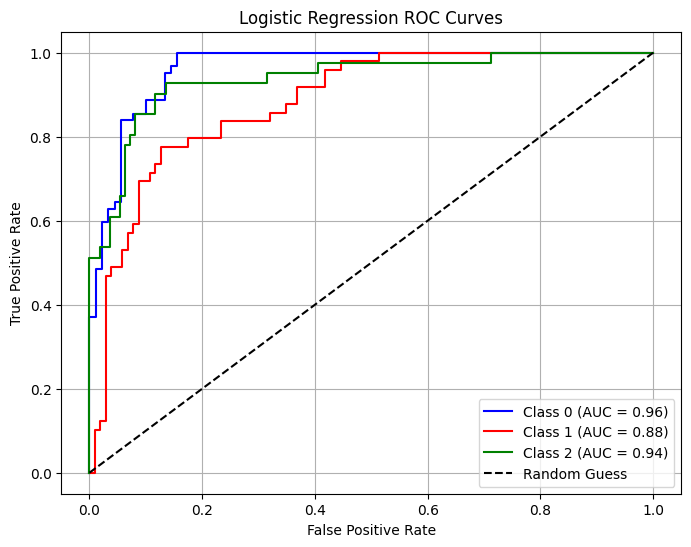

In [23]:
# Logistic Regression
# Get probability predictions from the model
log_probs = log_model.predict_proba(X_test)

# Make a new plot
plt.figure(figsize=(8, 6))

# Calculate and plot ROC for each class
for i in range(3):  # We have 3 classes
    # Get False Positive Rate (FPR) and True Positive Rate (TPR)
    fpr, tpr, _ = roc_curve(y_test_binary[:, i], log_probs[:, i])
    # Calculate AUC (area under the curve)
    auc_score = auc(fpr, tpr)
    # Plot the curve with a label
    plt.plot(fpr, tpr, color=colors[i], label=f'Class {i} (AUC = {auc_score:.2f})')

# Add a line for random guessing
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.xlabel('False Positive Rate')  # X-axis label
plt.ylabel('True Positive Rate')  # Y-axis label
plt.title('Logistic Regression ROC Curves')  # Title
plt.legend(loc='lower right')  # Show legend
plt.grid(True)  # Add grid lines
plt.show()  # Display the plot

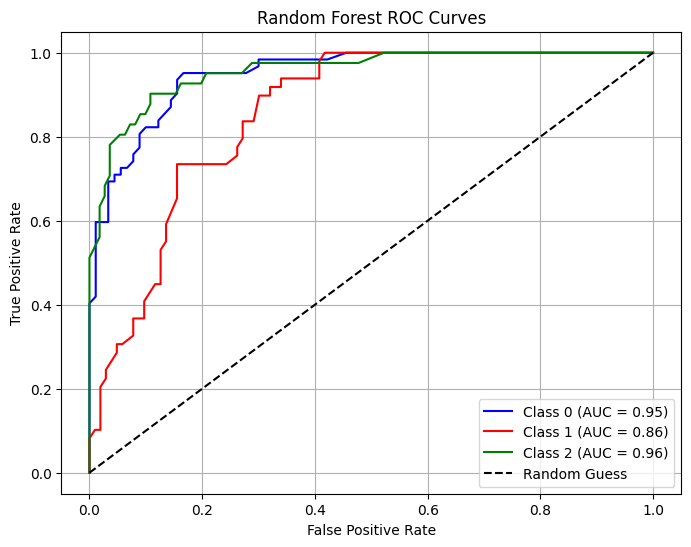

In [24]:
# Random Forest
# Get probability predictions from the model
rf_probs = rf_model.predict_proba(X_test)

# Make a new plot
plt.figure(figsize=(8, 6))

# Calculate and plot ROC for each class
for i in range(3):  # 3 classes
    fpr, tpr, _ = roc_curve(y_test_binary[:, i], rf_probs[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], label=f'Class {i} (AUC = {auc_score:.2f})')

# Add random guessing line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Make the plot look nice
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

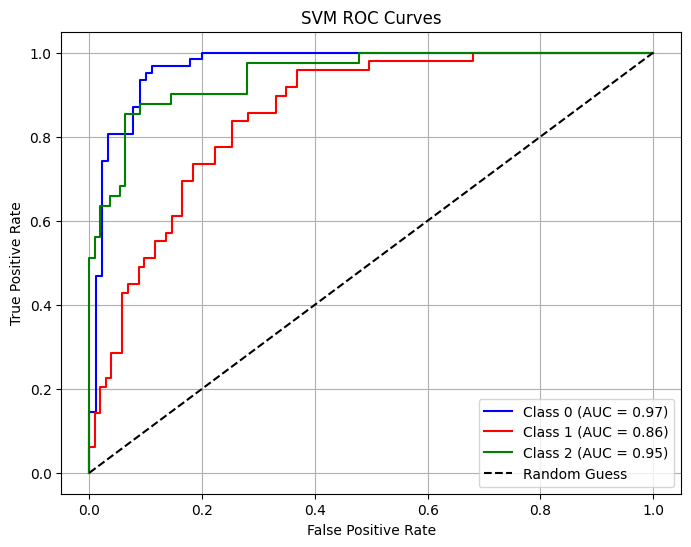

In [25]:
# SVM
# Get scores from the model
svm_scores = svm_model.decision_function(X_test)

# Make a new plot
plt.figure(figsize=(8, 6))

# Calculate and plot ROC for each class
for i in range(3):  # 3 classes
    fpr, tpr, _ = roc_curve(y_test_binary[:, i], svm_scores[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], label=f'Class {i} (AUC = {auc_score:.2f})')

# Add random guessing line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Make the plot look nice
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Ensemble Learning

## Bagging Classifier

In [26]:
# Tuned Bagging model
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=5),
    n_estimators=100,  # Fixed number of trees
    random_state=42
)

# Train the model
bagging_model.fit(X_train, y_train)
bagging_pred = bagging_model.predict(X_test)
bagging_acc = accuracy_score(y_test, bagging_pred)
print("\nTuned Bagging Classifier Results:")
print(f"Accuracy: {bagging_acc:.3f}")


Tuned Bagging Classifier Results:
Accuracy: 0.789


## Gradient Boosting

In [27]:
# Tuned Gradient Boosting
gb_model = GradientBoostingClassifier(
    n_estimators=200,      # More trees
    learning_rate=0.05,    # Slower learning
    max_depth=3,           # Moderate depth
    random_state=42
)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)
print("\nTuned Gradient Boosting Results:")
print(f"Accuracy: {gb_acc:.3f}")


Tuned Gradient Boosting Results:
Accuracy: 0.776


## AdaBoost

In [28]:
# Tuned AdaBoost
ada_model = AdaBoostClassifier(
    n_estimators=100,      # More learners
    learning_rate=0.5,     # Moderate learning
    random_state=42
)
ada_model.fit(X_train, y_train)
ada_pred = ada_model.predict(X_test)
ada_acc = accuracy_score(y_test, ada_pred)
print("\nTuned AdaBoost Results:")
print(f"Accuracy: {ada_acc:.3f}")


Tuned AdaBoost Results:
Accuracy: 0.737


## LightGBM

In [29]:
# Tuned LightGBM
lgb_model = lgb.LGBMClassifier(
    n_estimators=200,      # More trees
    learning_rate=0.05,    # Slower learning
    max_depth=4,           # Moderate depth
    min_data_in_leaf=5,
    min_gain_to_split=0.0,
    random_state=42,
    verbose=-1
)
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)
lgb_acc = accuracy_score(y_test, lgb_pred)
print("\nTuned LightGBM Results:")
print(f"Accuracy: {lgb_acc:.3f}")


Tuned LightGBM Results:
Accuracy: 0.783


##  Stacking

In [30]:
# Tuned base models
base_models = [
    ('log', LogisticRegression(C=0.5, max_iter=1000, random_state=42)),  # Regularized
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)),
    ('svm', SVC(C=1.0, kernel='linear', random_state=42))
]
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(C=0.5, max_iter=1000, random_state=42),
    cv=5
)
stacking_model.fit(X_train, y_train)
stacking_pred = stacking_model.predict(X_test)
stacking_acc = accuracy_score(y_test, stacking_pred)
print("\nTuned Stacking Classifier Results:")
print(f"Accuracy: {stacking_acc:.3f}")


Tuned Stacking Classifier Results:
Accuracy: 0.803


## Model Comparison (Classification)

In [31]:
# Dictionary to store results
results = {'Model': [], 'Accuracy': []}

# trained models to predict and computed accuracy
trained_models = [
    ('Logistic Regression', log_model),
    ('Random Forest', rf_model),
    ('SVM', svm_model),
    ('Bagging', bagging_model),
    ('Gradient Boosting', gb_model),
    ('AdaBoost', ada_model),
    ('LightGBM', lgb_model),
    ('Stacking', stacking_model)
]

for name, model in trained_models:
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    results['Model'].append(name)
    results['Accuracy'].append(acc)

# Create DataFrame
results_classification_df = pd.DataFrame(results)

# Round and sort by Accuracy
results_classification_df['Accuracy'] = results_classification_df['Accuracy'].round(3)
results_classification_df = results_classification_df.sort_values(by='Accuracy', ascending=False)

# Add rank
results_classification_df['Rank'] = range(1, len(results_classification_df) + 1)

# Reorder columns
results_classification_df = results_classification_df[['Rank', 'Model', 'Accuracy']]

# Print ranked table
print("\nModel Comparison (Ranked by Accuracy):\n")
print(results_classification_df.to_string(index=False))


Model Comparison (Ranked by Accuracy):

 Rank               Model  Accuracy
    1 Logistic Regression     0.809
    2            Stacking     0.803
    3       Random Forest     0.789
    4             Bagging     0.789
    5            LightGBM     0.783
    6   Gradient Boosting     0.776
    7                 SVM     0.770
    8            AdaBoost     0.737


# The most important features using feature importance scores

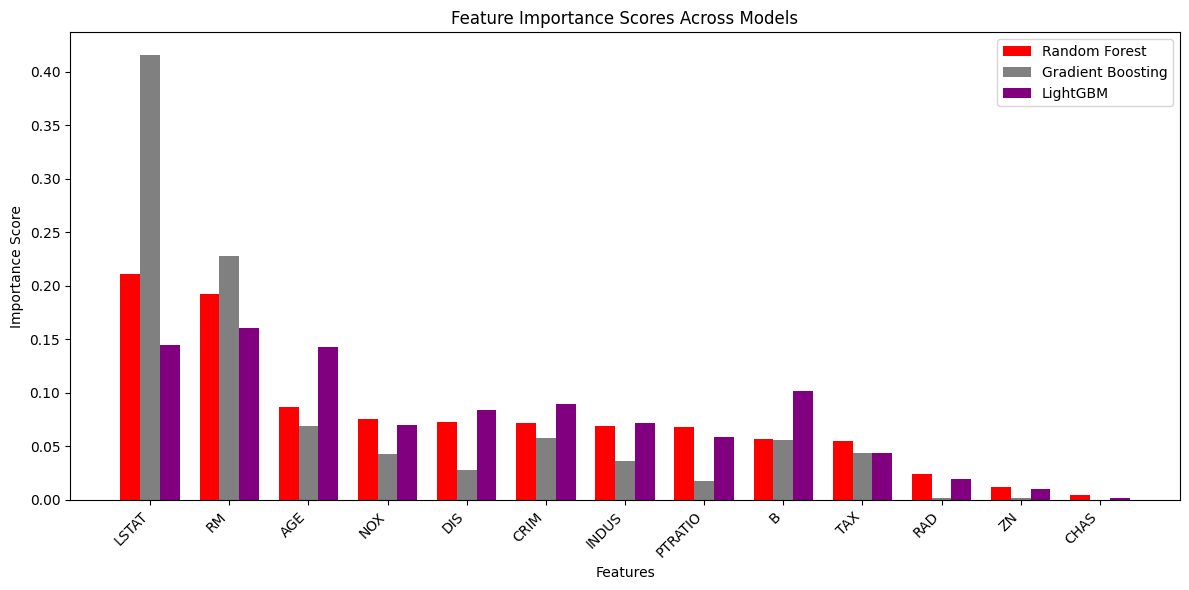

In [32]:
# Feature names
feature_names = X_train.columns

# Dictionary to store feature importances
importance_results = {'Feature': feature_names}

# Extract importance scores from trained models
rf_importance = rf_model.feature_importances_
gb_importance = gb_model.feature_importances_
lgb_importance = lgb_model.feature_importances_

lgb_importance = lgb_importance / lgb_importance.sum()

# Add to dictionary
importance_results['Random Forest'] = rf_importance
importance_results['Gradient Boosting'] = gb_importance
importance_results['LightGBM'] = lgb_importance

# Create DataFrame
importance_df = pd.DataFrame(importance_results)

# Sort by Random Forest importance
importance_df = importance_df.sort_values(by='Random Forest', ascending=False)

# Set up the plot
plt.figure(figsize=(12, 6))
bar_width = 0.25
index = range(len(feature_names))

# Plot bars for each model
plt.bar(index, importance_df['Random Forest'], bar_width, label='Random Forest', color='red')
plt.bar([i + bar_width for i in index], importance_df['Gradient Boosting'], bar_width, label='Gradient Boosting', color='gray')
plt.bar([i + 2 * bar_width for i in index], importance_df['LightGBM'], bar_width, label='LightGBM', color='purple')

# Customize plot
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores Across Models')
plt.xticks([i + bar_width for i in index], importance_df['Feature'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()

# Analyze and compare model performance for both regression and classification


Model Comparison (Ranked by R²):

 Rank                  Model    R²    MSE   MAE
    1 Random Forest (Random) 0.873  9.445 2.085
    2          Random Forest 0.871  9.610 2.082
    3   Random Forest (Grid) 0.871  9.633 2.083
    4          Decision Tree 0.844 11.588 2.536
    5   Decision Tree (Grid) 0.844 11.588 2.536
    6 Decision Tree (Random) 0.844 11.588 2.536
    7             SVR (Grid) 0.841 11.810 2.143
    8           SVR (Random) 0.841 11.810 2.143
    9      Linear Regression 0.711 21.517 3.163
   10         Ridge (Random) 0.711 21.549 3.161
   11           Ridge (Grid) 0.707 21.807 3.150
   12           Lasso (Grid) 0.694 22.798 3.209
   13         Lasso (Random) 0.694 22.798 3.209
   14                    SVR 0.655 25.693 2.909


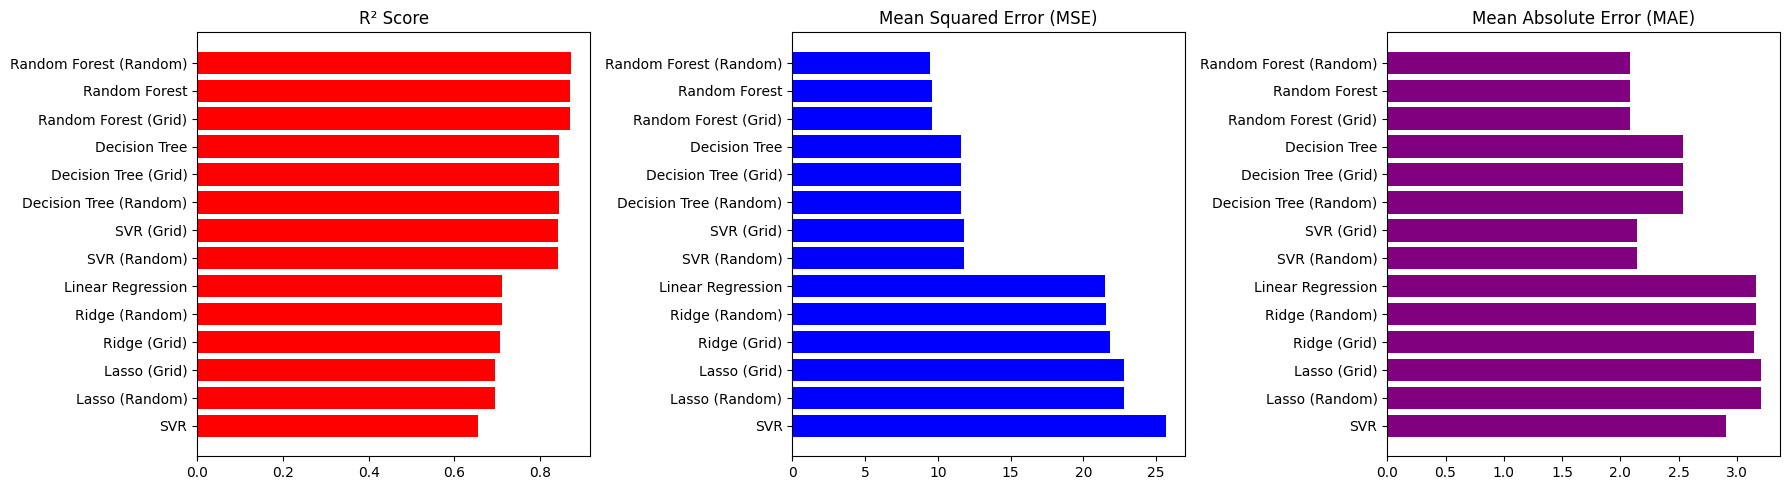


Model Comparison (Ranked by Accuracy):

 Rank               Model  Accuracy
    1 Logistic Regression     0.809
    2            Stacking     0.803
    3       Random Forest     0.789
    4             Bagging     0.789
    5            LightGBM     0.783
    6   Gradient Boosting     0.776
    7                 SVM     0.770
    8            AdaBoost     0.737


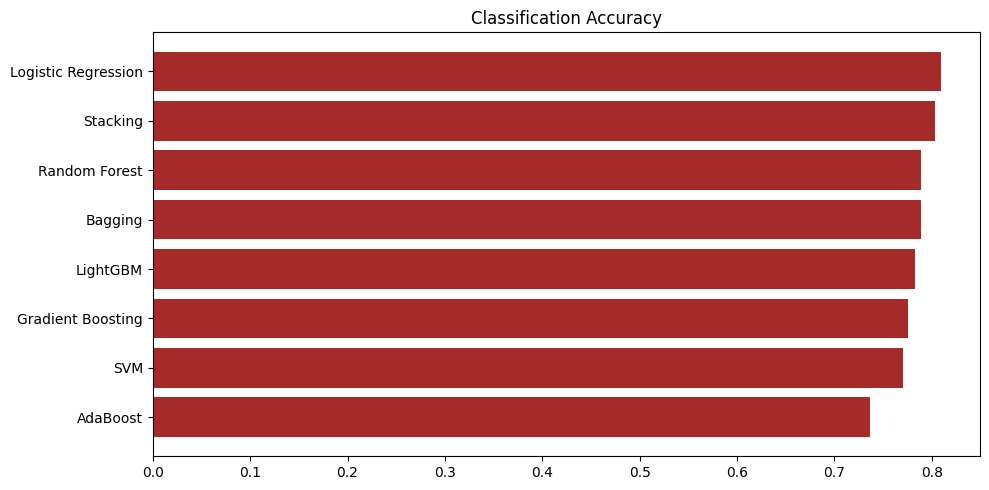

In [33]:
print("\nModel Comparison (Ranked by R²):\n")
print(results_regression_df.to_string(index=False))

# Regression Plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# R² Plot
axes[0].barh(results_regression_df['Model'], results_regression_df['R²'], color='red')
axes[0].set_title('R² Score')
axes[0].invert_yaxis()

# MSE Plot
axes[1].barh(results_regression_df['Model'], results_regression_df['MSE'], color='blue')
axes[1].set_title('Mean Squared Error (MSE)')
axes[1].invert_yaxis()

# MAE Plot
axes[2].barh(results_regression_df['Model'], results_regression_df['MAE'], color='purple')
axes[2].set_title('Mean Absolute Error (MAE)')
axes[2].invert_yaxis()

plt.tight_layout()
plt.show()

print("\nModel Comparison (Ranked by Accuracy):\n")
print(results_classification_df.to_string(index=False))

# Classification Accuracy Plot
plt.figure(figsize=(10, 5))
plt.barh(results_classification_df['Model'], results_classification_df['Accuracy'], color='brown')
plt.title('Classification Accuracy')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
